# 군집화(Clustering)

* 대표적인 비지도학습 알고리즘
* 레이블이 없는 데이터를 그룹화 하는 알고리즘

![clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## 데이터 생성

In [2]:
def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:,0], X[:, 1])

In [3]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [4]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

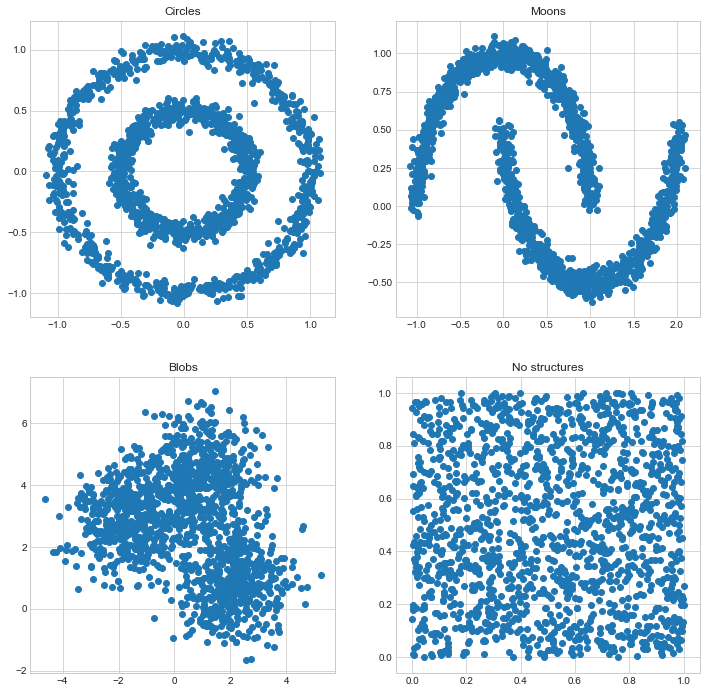

In [5]:
plt.figure(figsize=(12,12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No structures')

In [6]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'label_'):
        labels = model.labels_.astype(np.int)
    else:
        labels = model.predict(X)
        
    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#8CD790', '#353866'])  
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:,0], X[:, 1], color = colors[labels])


## K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

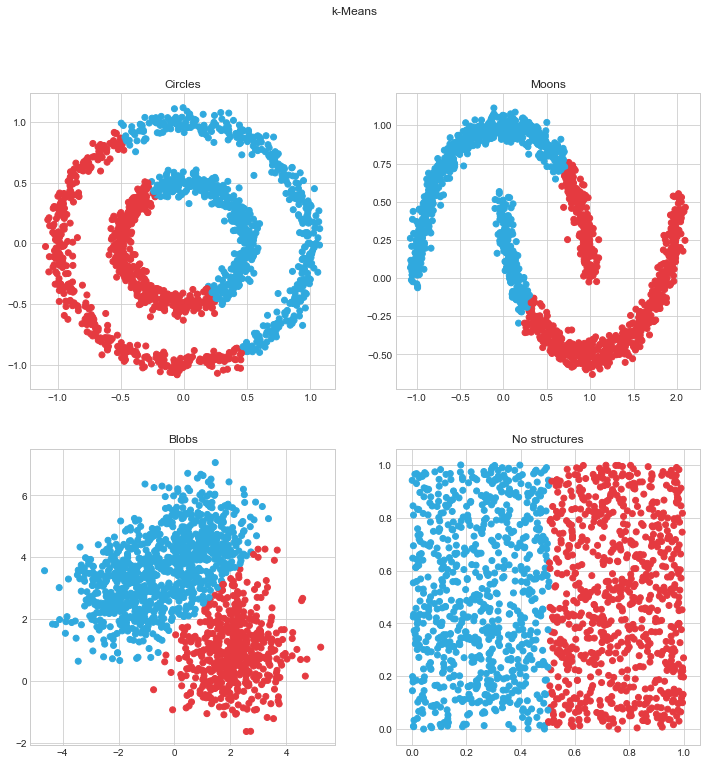

In [7]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'No structures')

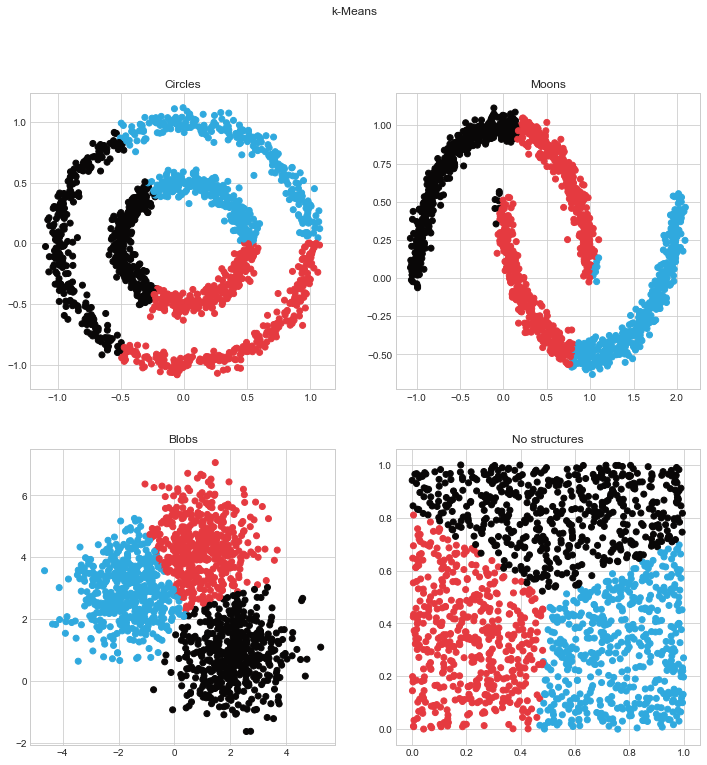

In [8]:
#cluster개수가 3일 때 코드 작성

fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No structures')

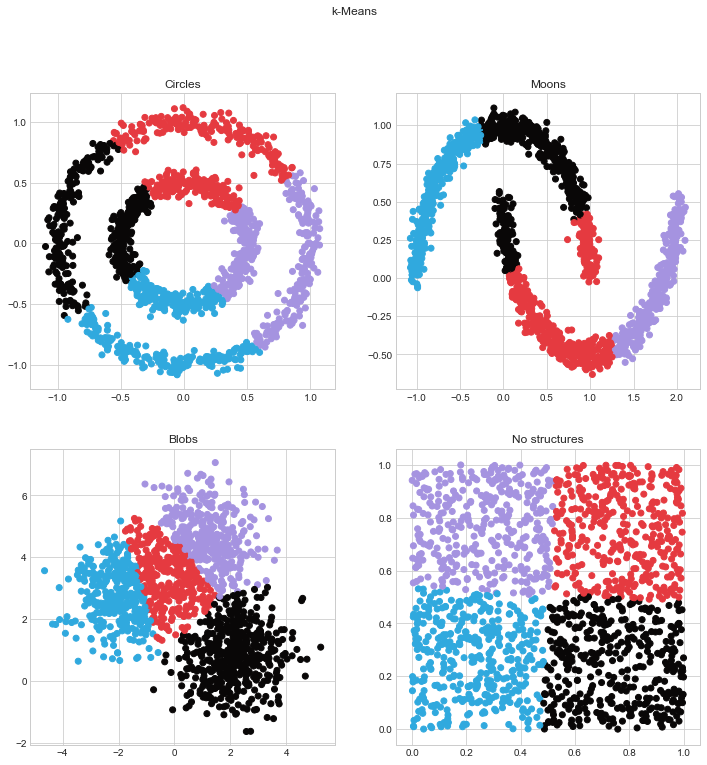

In [9]:
#cluster개수가 4일 때 코드 작성

fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'No structures')

### 붓꽃 데이터 군집화
* K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
* 같은 종류의 붓꽃끼리 잘 군집화가 되었다.

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [29]:
#model에 cluster수를 3으로 하는 KMeans를 부여
#붓꽃 데이터를 fitting해서 예측하는 코드를 작성
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)





In [30]:
idx = np.where(predict==0)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
idx = np.where(predict==1)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [26]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 손글씨 데이터 군집화

In [17]:
from sklearn.datasets import load_digits

In [18]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [19]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
X = digits.data.reshape(-1, 8, 8)
y = digits.target

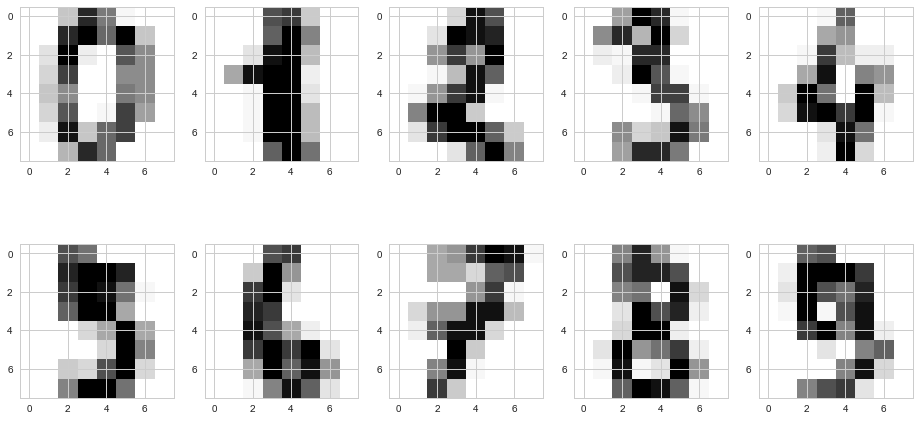

In [22]:
plt.style.use(['seaborn-notebook'])
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])

### K-Means

In [23]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [24]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [1 2 8 8 8 8 2 2 8 2 9 8 1 6 8 1 8 2 2 8 8 8 8 8 8 8 8 8 8 4 8 8 4 8 8 8 8
 8 1 1 8 1 8 8 8 1 1 1 1 1 1 1 8 1 1 8 8 8 6 2 8 8 8 8 8 8 8 8 8 1 8 8 8 8
 1 1 8 1 8 1 1 8 2 1 1 1 1 1 1 8 1 1 8 8 8 1 1 1 8 1 1 1 8 1 1 1 1 1 1 8 8
 1 1 8 1 8 1 1 8 1 1 1 1 1 1 8 1 1 8 8 8 8 1 8 1 1 1 1 1 1 1 1 8 1 8 8 8 8
 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 1 7 8 1 1 8 8 1 3 1 7 8 1 3 3 4
 1 8 1 1 1 1 8 1 1 8 1 1 3 8 1 8 8 1 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 8 8 8 8]
Cluster 2: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 8 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster 3: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5
 7 5 5 7 5 7 7 5 5 7 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

Cluster: 1


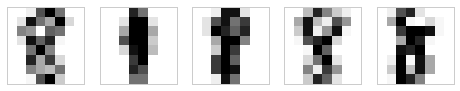

Cluster: 2


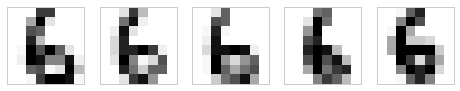

Cluster: 3


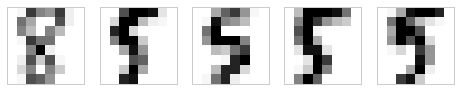

Cluster: 4


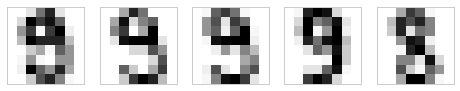

Cluster: 5


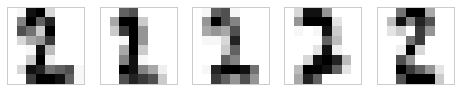

Cluster: 6


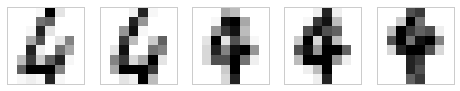

Cluster: 7


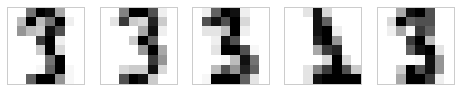

Cluster: 8


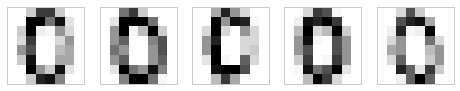

Cluster: 9


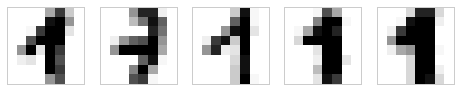

Cluster: 10


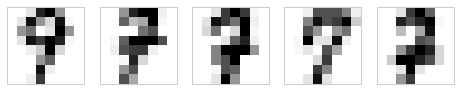

In [25]:
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]
    
    k = 1
    
    print('Cluster: {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
    plt.show()